# Определение закономерностей успеха игр

#### Определим факторы, влияющие на успех игры, проверим гипотезы.
##### Исследование разделим на несколько частей.

Перед нами исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.	
_____________________________________________________________________________________
##### Часть 1. Импортируем библиотеки и прочитаем данные
* [Импортируем библиотеки и прочитаем данные](#1-bullet)

##### Часть 2. Подготовим данные
* [Приведем названия столбцов к нижнему регистру](#2-bullet)
* [Обработаем пропуски](#3-bullet)
* [Изменим тип данных](#4-bullet)
* [Добавим столбец с суммарными продажами по всем регионам](#5-bullet)

##### Часть 3. Проанализируем данные
* [Посмотрим сколько игр выпускалось в разные годы](#6-bullet)
* [Посмотрим как менялись продажи по платформам](#7-bullet)
* [Выберем актуальные данные для анализа](#8-bullet)
* [Проанализируем платформы](#9-bullet)
* [Посмотрим на распределение глобальных продаж игр в разрезе платформ](#10-bullet)
* [Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#11-bullet)
* [Сравним выводы по одной платформе с выводами по всем платформам](#12-bullet)
* [Посмотрим на общее распределение игр по жанрам](#13-bullet)

##### Часть 4. Составим портрет пользователя кажджого региона
* [Составим портрет пользователя для региона NA](#14-bullet)
* [Составим портрет пользователя для региона EU](#15-bullet)
* [Составим портрет пользователя для региона JP](#16-bullet)

##### Часть 5. Проверим гипотезы
* [Действительно ли средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#17-bullet)
* [Действительно ли средние пользовательские рейтинги жанров Action и Sports разные](#18-bullet)

##### Часть 6. Заключение
* [Общий вывод](#19-bullet)

___________________________________________________   
###### Описание данных:
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


<a id='1-bullet'></a>
### 1. Импортируем библиотеки и прочитаем данные

In [1]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2. Подготовим данные

<a id='2-bullet'></a>
#### Приведем названия столбцов к нижнему регистру

In [4]:
#приведем названия столбцов к нижнему регистру для удобства
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5028,Tales of Hearts,PSV,2013.0,Role-Playing,0.11,0.11,0.09,0.07,NaN,NaN,NaN
6414,Sonic X: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,0.19,0.07,0.00,0.00,NaN,NaN,NaN
12252,"Flower, Sun, and Rain",DS,2008.0,Adventure,0.06,0.00,0.00,0.00,54.0,7.1,T
9734,O.D.T.: Escape... Or Die Trying,PS,1997.0,Adventure,0.07,0.05,0.00,0.01,NaN,NaN,NaN
11844,Hang On GP,SAT,1995.0,Racing,0.00,0.00,0.07,0.00,NaN,NaN,NaN
5632,No.1 Muscle Ranking - Kinniku Banzuke Vol. 1: ...,PS,1999.0,Sports,0.00,0.00,0.30,0.02,NaN,NaN,NaN
11823,Winx Club,GBA,2005.0,Shooter,0.05,0.02,0.00,0.00,NaN,tbd,E
241,Madden NFL 07,PS2,2006.0,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E
103,Just Dance,Wii,2009.0,Misc,3.48,2.99,0.00,0.73,49.0,8,E10+
7219,Jackass the Game,PSP,2007.0,Action,0.09,0.08,0.00,0.05,58.0,7,M


<a id='3-bullet'></a>
#### Обработаем пропуски

In [6]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
#для пропусков в годе выпуска нет адекватной замены, отфильтруем эти строки
df = data[data['year_of_release'] > 0]
part_of_data = 1 - (data[data['year_of_release'] > 0].shape[0] / data.shape[0])
print('Отфильтровали {:.1%}'.format(part_of_data))

Отфильтровали 1.6%


In [9]:
#проверим наличие дубликатов в данных
df.duplicated().sum()

0

In [10]:
df.loc[df['name'].isnull(), 'name'] = 'no_name_'
df = df.loc[df['name'] != 'no_name_']

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Отфильтровали пропуски в "year_of_release" (потеряли 1,6% данных), "name" и "genre", так как они имеют малую долю в общей массе и заполнить их ничем нельзя. Пропуски в "rating", "user_score", "critic_score" нельзя заполнить адекватными данными, оставим в таком виде, пока это не мешает расчетам.

<a id='4-bullet'></a>
#### Изменим тип данных

In [12]:
#приведем к int значения в year_of_release
#можно было бы привести к значению года, но это уже избыточно, тк нет даты, месяца или времени
df['year_of_release'] = df['year_of_release'].astype('int')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#сокращение tbd есть только в user_score
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan 
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

<a id='5-bullet'></a>
#### Добавим столбец с суммарными продажами по всем регионам

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11429,Gintama Gin-Oh Quest: Gin-San ga Tenshoku Shit...,DS,2007,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN,0.08
5697,Shrek the Third,PSP,2007,Action,0.08,0.15,0.00,0.09,57.0,NaN,E10+,0.23
4049,Middle-Earth: Shadow of Mordor,X360,2014,Action,0.28,0.16,0.00,0.04,NaN,4.6,M,0.44
12442,Monster Garage,XB,2004,Strategy,0.05,0.01,0.00,0.00,38.0,NaN,T,0.06
4986,Yoshi Touch & Go,DS,2005,Platform,0.34,0.02,0.00,0.03,NaN,NaN,NaN,0.36
6596,TOCA Race Driver 2: Ultimate Racing Simulator,PSP,2005,Racing,0.00,0.25,0.00,0.00,NaN,NaN,NaN,0.25
16196,Bakumatsu Koihana: Shinsengumi DS,DS,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
9535,Shin Megami Tensei: Digital Devil Saga,PS2,2004,Role-Playing,0.06,0.05,0.00,0.02,78.0,8.2,M,0.11
3344,Jaws Unleashed,PS2,2006,Action,0.50,0.02,0.00,0.08,52.0,7.5,M,0.52
4500,InuYasha: The Secret of the Cursed Mask,PS2,2004,Role-Playing,0.21,0.17,0.00,0.06,51.0,8.1,T,0.38


В процессе подготовки данных появились следующие выводы:

   - Столбцы были названы в разном регистре. Стоит выяснить почему так получилось у инженеров, занимающихся выгрузкой.
   - Обнаружили пропуски в годе выпуска, для этих данных нет адекватной замены, отфильтровали эти строки, упустив 1,6% данных. Пропуски в рейтингах критиков, пользователей и возрастных ограничений оставим не заполняя, до тех пор, пока они не будут мешать расчетам, так как при заполнении велика вероятность сильно исказить картину. Также найдены 2 состоящие практически только из одиних пропусков строки, отильтровали их, возможно они появились в процессе выгрузки данных, когда было нестабильное соединение, желательно это выяснить.
   - Дубликатов в данных не обнаружено.
   - Обработали сокращение tbd, оно нашлось только в user_score. Это сокращение означает, что оценки ещё нет, она будет выставленна позднее. Это очень похоже на сущность пропусков в этих таких же колонках, поэтому заменим на пропуки.

### 3. Проанализируем данные

<a id='6-bullet'></a>
#### Посмотрим сколько игр выпускалось в разные годы

Text(0, 0.5, 'Количество выпущенных игр, шт')

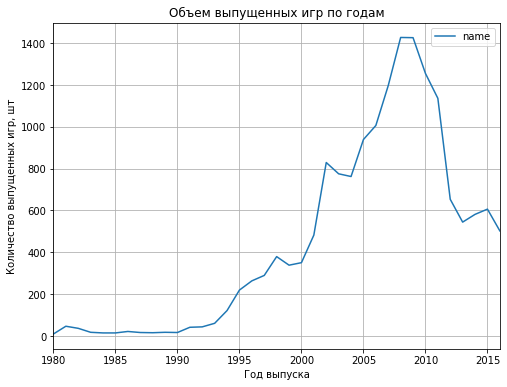

In [16]:
#посмотрим сколько игр выпускалось в разные годы
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, figsize=(8, 6))
plt.title('Объем выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр, шт')

Видно как индустрия пережила пик в 2008-09 годах и после откатилась по количеству выпущенных игр на уровень 2001-02 гг. и сейчас тренд на падение. Думаю актуальным можно считать период не раньше 2000 года, уточним эту гипотезу.

In [17]:
df\
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False)\
    .head(6)

,total_sales
platform,
PS2,1043.09
X360,876.36
Wii,813.47
PS3,796.75
DS,743.74
PS,686.89


In [18]:
top_platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']

<a id='7-bullet'></a>
#### Посмотрим как менялись продажи по платформам

Text(0, 0.5, 'Суммарные продажи, млн. шт')

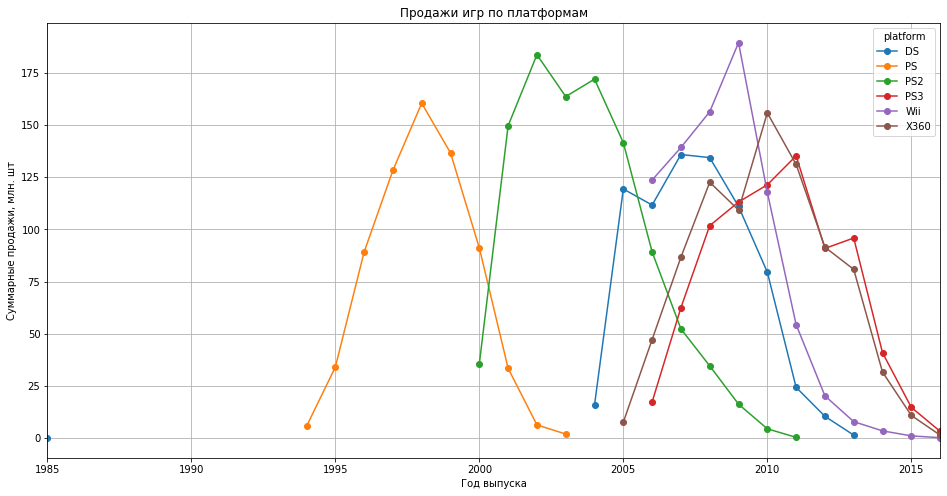

In [19]:
#посмотрим, как менялись продажи по платформам.
#выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
#поймем за какой характерный срок появляются новые и исчезают старые платформы?
platform_by_year = (df
                    .query('platform == @top_platforms')
                    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                    )

platform_by_year.plot(style='o-', grid=True, figsize=(16, 8))
plt.title('Продажи игр по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн. шт')

In [20]:
df\
.query('platform == @top_platforms')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.fillna(0)

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,0.00,0.00,0.00,0.00,0.00
1994,0.00,5.63,0.00,0.00,0.00,0.00
1995,0.00,34.00,0.00,0.00,0.00,0.00
1996,0.00,89.16,0.00,0.00,0.00,0.00
1997,0.00,128.30,0.00,0.00,0.00,0.00
1998,0.00,160.44,0.00,0.00,0.00,0.00
1999,0.00,136.61,0.00,0.00,0.00,0.00
2000,0.00,91.09,35.59,0.00,0.00,0.00
2001,0.00,33.42,149.65,0.00,0.00,0.00


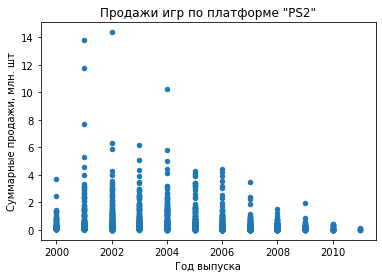

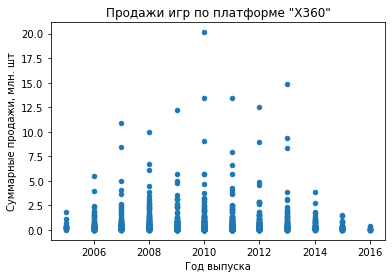

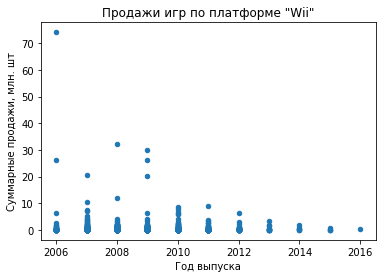

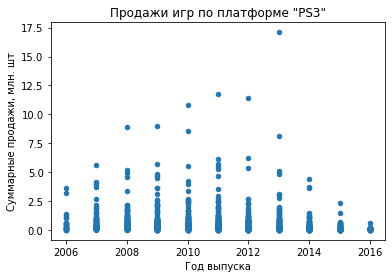

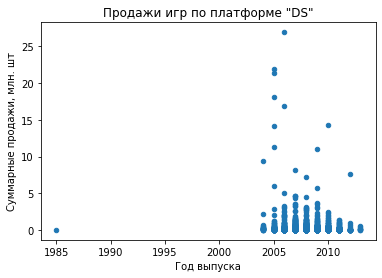

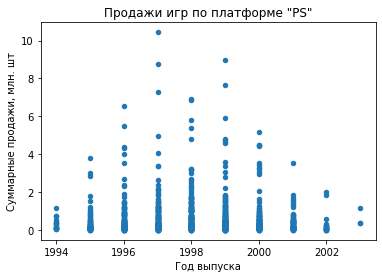

In [21]:
for platform in top_platforms:
    label = 'Продажи игр по платформе "' + platform + '"' 
    df.query('platform == @platform').plot(x='year_of_release', y='total_sales', kind='scatter')
    plt.title(label)
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи, млн. шт')
    plt.show

Выделили платформы с топовыми продажами ('PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS'), на графиках видно, как менялись продажи с течением времени. Распределение этих данных, с некоторыми допущениями, симметричное.

<a id='8-bullet'></a>
#### Выберем актуальные данные для анализа

In [22]:
life_cycle = []

for platform in top_platforms:
    min = df.query('platform == @platform')['year_of_release'].quantile(0.03)
    max = df.query('platform == @platform')['year_of_release'].quantile(0.97)
    per_pop = max - min + 1
    print('Срок жизни {}: {} лет'.format(platform, per_pop))
    life_cycle.append(per_pop)
    
print()
life_cycle_median = pd.Series(life_cycle).median()
print('Медианный срок жизни платформы {:.0f} лет'.format(life_cycle_median))

Срок жизни PS2: 10.0 лет
Срок жизни X360: 10.0 лет
Срок жизни Wii: 7.0 лет
Срок жизни PS3: 9.0 лет
Срок жизни DS: 7.0 лет
Срок жизни PS: 7.0 лет

Медианный срок жизни платформы 8 лет


In [23]:
df_actual = df.query('year_of_release >= 2009')
#print('Отфильтровали {:.2%} данных'.format(df_actual.shape[0] / df.shape[0]))

Медианный срок жизни платформы 8 лет, дальше будем пользоваться только данными от 2009 года и новее.

<a id='9-bullet'></a>
#### Проанализируем платформы

In [24]:
#какие платформы лидируют по продажам, растут или падают? Отберем несколько потенциально прибыльных платформ
top_platforms_actual_pivot = (df_actual
                              .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                              .sort_values(by='total_sales', ascending=False)
                              .head(6))

top_platforms_actual = list(top_platforms_actual_pivot.index)

print('По продажам лидируют следующие платформы:')
top_platforms_actual_pivot

По продажам лидируют следующие платформы:


,total_sales
platform,
PS3,615.19
X360,612.31
Wii,394.29
PS4,265.79
3DS,244.54
DS,226.61


Text(0, 0.5, 'Суммарные продажи, млн. шт')

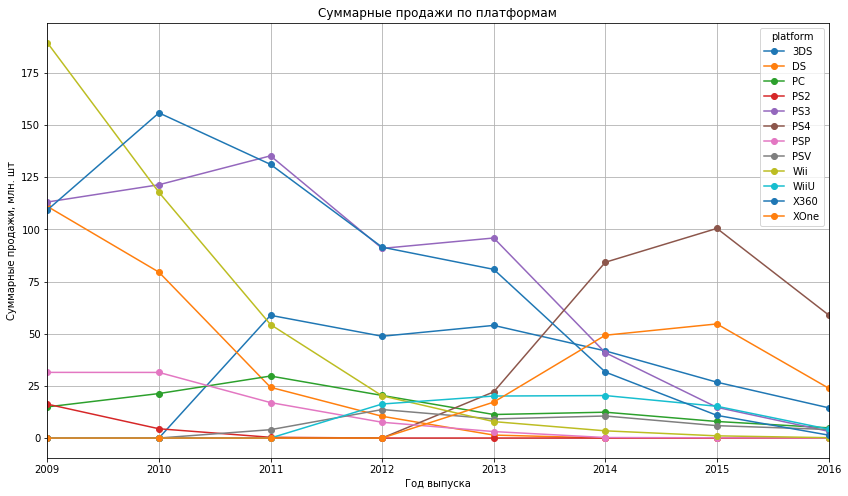

In [25]:
df_actual\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.fillna(0)\
.plot(style='o-', figsize=(14, 8), grid=True)
plt.title('Суммарные продажи по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн. шт')

Мы отобрали топ 6 платформ по суммарным продажам. Ранее мы уже находили такой список, после фильтрации по периоду в него не попали PS2 и PS, зато вошли PS3 и PS4.

Можно сказать следующее:
1. Видим падение по PS3, X360, Wii, DC.
2. Нестабильная ситуация, при которой сначала видим небольшой рост, потом небольшое падение по PS4, XOne, 3DS.
3. Потенциально перспективные и растущие платформы: WiiU и PC.

<a id='10-bullet'></a>
#### Посмотрим на распределение глобальных продаж игр в разрезе платформ

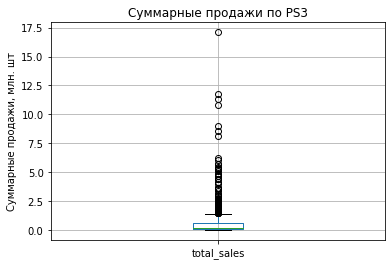

count    1051.000000
mean        0.585338
std         1.208904
min         0.010000
25%         0.080000
50%         0.220000
75%         0.620000
max        17.090000
Name: total_sales, dtype: float64


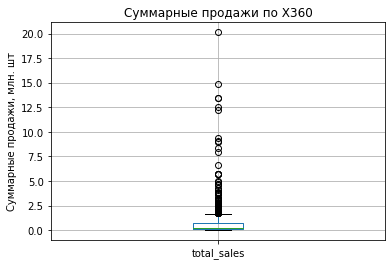

count    852.000000
mean       0.718674
std        1.593265
min        0.010000
25%        0.090000
50%        0.240000
75%        0.710000
max       20.130000
Name: total_sales, dtype: float64


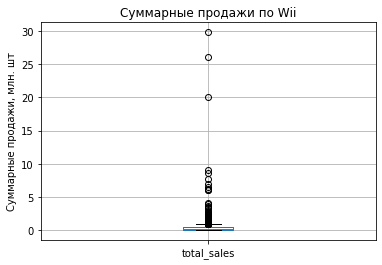

count    775.000000
mean       0.508761
std        1.787619
min        0.010000
25%        0.080000
50%        0.170000
75%        0.400000
max       29.820000
Name: total_sales, dtype: float64


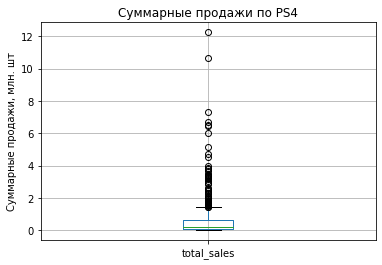

count    392.000000
mean       0.678036
std        1.355221
min        0.010000
25%        0.050000
50%        0.170000
75%        0.612500
max       12.250000
Name: total_sales, dtype: float64


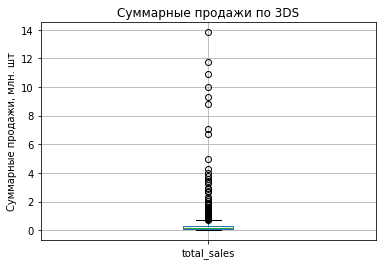

count    512.000000
mean       0.477617
std        1.356633
min        0.010000
25%        0.050000
50%        0.120000
75%        0.320000
max       13.820000
Name: total_sales, dtype: float64


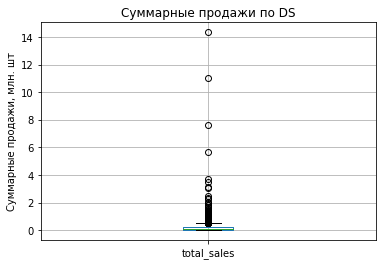

count    910.000000
mean       0.249022
std        0.754565
min        0.010000
25%        0.040000
50%        0.100000
75%        0.227500
max       14.330000
Name: total_sales, dtype: float64


In [26]:
#посмотрим на распределение глобальных продаж игр в разрезе платформ
#df_actual.query('platform == @top_platforms_actual')

for platform in top_platforms_actual:
    data = df_actual.query('platform == @platform')
    data.boxplot('total_sales')
    plt.title('Суммарные продажи по ' + platform)
    plt.ylabel('Суммарные продажи, млн. шт')
    plt.show()
    print(data['total_sales'].describe())


На диаграмах размаха видны выбросы:
1. PS3. Есть выбросы около 17,5 и выше 7,5. Медиана на уровне 0,22, среднее 0,58.
2. Х360. Есть выбросы около 20 и выше 7,5. Медиана на уровне 0,24, среднее 0,72.
3. Wii. Есть выбросы около 30, 25 и 20. Медиана на уроне 0,17, среднее 0,51.
4. PS4. Есть выбросы около 12, 10 и выше 6. Медиана на уровне 0,17, среднее 0,68.
5. 3DS. Есть выбросы выше 5. Медиана на уровне 0,12, среднее 0,48.
6. DC. Есть выбросы выше 4. Медиана на уровне 0,1, среднее 0,25.

<a id='11-bullet'></a>
#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

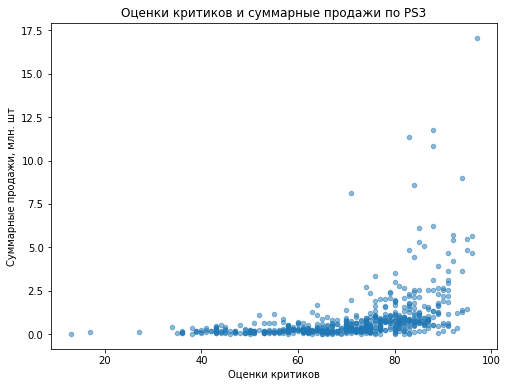

Коэффициент корреляции между critic_score и total_sales: 0.4226


In [27]:
#построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

df_ps3 = df_actual.query('platform == "PS3"')

df_ps3.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.5, figsize=(8, 6))
plt.title('Оценки критиков и суммарные продажи по PS3')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи, млн. шт')
plt.show()

corr_critic = df_ps3['critic_score'].corr(df_ps3['total_sales'])
print('Коэффициент корреляции между critic_score и total_sales: {:.4f}'.format(corr_critic))

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


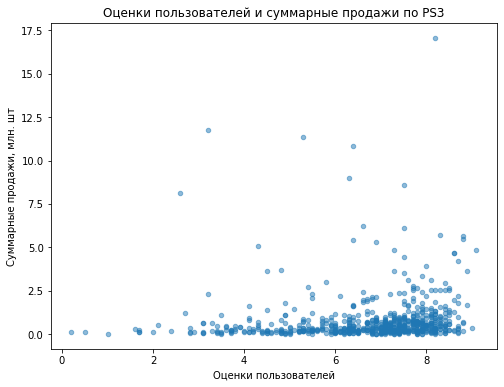

Коэффициент корреляции между user_score и total_sales: 0.0973


In [28]:
df_ps3.loc[df_ps3['user_score'].isnull(), 'user_score'] = 500000
df_ps3['user_score'] = df_ps3['user_score'].astype('float')
df_ps3 = df_ps3.query('user_score != 500000')

df_ps3.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.5, figsize=(8, 6))
plt.title('Оценки пользователей и суммарные продажи по PS3')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи, млн. шт')
plt.show()

corr_user = df_ps3['user_score'].corr(df_ps3['total_sales'])
print('Коэффициент корреляции между user_score и total_sales: {:.4f}'.format(corr_user))

Аналзируя продажи по платформе PS3, наблюдаем линейную корреляцию средней силы между critic_score и total_sales (0.4226). Видны выбросы, которые, в целом, не мешают оценить картину. Чем выше рейтинг критиков, тем больше продаж у игры.

Также наблюдаем слабую линейную корреляцию между user_score и total_sales (0.0973). При этом на графике видна значительно более сильная скученность там, где рейтинг пользователей выше.

<a id='12-bullet'></a>
#### Сравним выводы по одной платформе с выводами по всем платформам

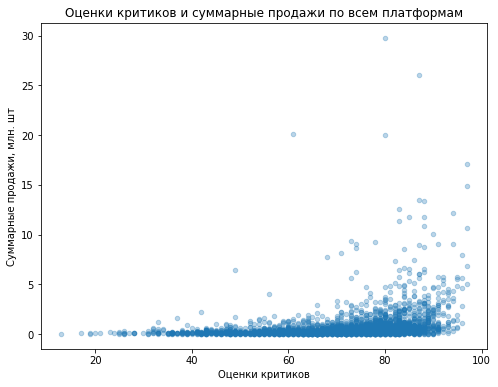

Коэффициент корреляции между critic_score и total_sales: 0.2913


In [29]:
#сравним выводы по одной платформе с выводами по всем платформам

df_actual.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3, figsize=(8, 6))
plt.title('Оценки критиков и суммарные продажи по всем платформам')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи, млн. шт')
plt.show()

corr_critic = df_actual['critic_score'].corr(df_actual['total_sales'])
print('Коэффициент корреляции между critic_score и total_sales: {:.4f}'.format(corr_critic))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


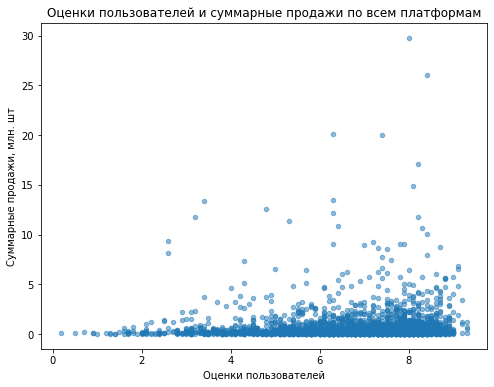

Коэффициент корреляции между user_score и total_sales: 0.0721


In [30]:
df_actual.loc[df_actual['user_score'].isnull(), 'user_score'] = 500000
df_actual['user_score'] = df_actual['user_score'].astype('float')
df_actual_user = df_actual.query('user_score != 500000')

df_actual_user.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.5, figsize=(8, 6))
plt.title('Оценки пользователей и суммарные продажи по всем платформам')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи, млн. шт')
plt.show()

corr_user = df_actual_user['user_score'].corr(df_actual_user['total_sales'])
print('Коэффициент корреляции между user_score и total_sales: {:.4f}'.format(corr_user))

Аналзируя продажи по всем платформам, наблюдаем линейную корреляцию средней силы между critic_score и total_sales (0.2913), она слабее, чем по PS3. Видны выбросы, которые, в целом, не мешают оценить картину. Чем выше рейтинг критиков, тем больше продаж у игры.Также наблюдаем слабую линейную корреляцию между user_score и total_sales (0.0721), она также слабее, чем по PS3. При этом на графике видна значительно более сильная скученность там, где рейтинг пользователей выше.

<a id='13-bullet'></a>
#### Посмотрим на общее распределение игр по жанрам

In [31]:
#посмотрим на общее распределение игр по жанрам.

df_actual\
.pivot_table(index='genre', values='total_sales', aggfunc='sum',)\
.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,717.79
Shooter,483.83
Sports,411.49
Role-Playing,335.00
Misc,280.76
Platform,145.26
Racing,135.85
Fighting,101.22
Simulation,95.89


Активные жанры продаются лучше, чем те, в сюжете которых меньше экшена. При этом высокую долю занимаю такие нишевые жанры как sports и role-playing. Можно предположить, что чем меньше в игре активности, тем ее меньше покупают.

#### В процессе анализа данных появились следующие выводы:
   - Анализируя количество выпусков игр по годам можно заметить как индустрия пережила пик в 2008-09 годах и после откатилась по количеству выпущенных игр на уровень 2001-02 гг. и на 2016 год тренд на дальнейшее снижение.
   - Распределение данных по платформам с топовыми продажами (PS2, X360, Wii, PS3, DS, PS), с некоторыми допущениями, симметричное.
   - Медианный срок жизни платформы 8 лет, актуальным выбрали период от 2009 года и новее.
   - Лидирующие в актуальном периоде платформы: PS3, X360, Wii, PS4, 3DS, DS. Ранее мы уже находили аналогичный список, после фильтрации по периоду в него не попали PS2 и PS, зато вошли PS3 и PS4.

   Оценивая текущее состояние продаж по платформам можем сказать следующее:
   - Видим падение по PS3, X360, Wii, DC.
   - Нестабильная ситуация, при которой сначала видим небольшой рост, потом небольшое падение по PS4, XOne, 3DS.
   - Потенциально перспективные и растущие платформы: WiiU и PC.

   - Аналзируя продажи по платформе PS3, наблюдаем линейную корреляцию средней силы между critic_score и total_sales (0.4226). Видны выбросы, которые, в целом, не мешают оценить картину. Чем выше рейтинг критиков, тем больше продаж у игры. Также наблюдаем слабую линейную корреляцию между user_score и total_sales (0.0973). При этом на графике видна значительно более сильная скученность там, где рейтинг пользователей выше.

   - Аналзируя продажи по всем платформам, также наблюдаем линейную корреляцию средней силы между critic_score и total_sales (0.2913), она слабее, чем по PS3. Видны выбросы, которые, в целом, не мешают оценить картину. Чем выше рейтинг критиков, тем больше продаж у игры.Также наблюдаем слабую линейную корреляцию между user_score и total_sales (0.0721), она также слабее, чем по PS3. При этом на графике видна значительно более сильная скученность там, где рейтинг пользователей выше.

   - Есть предположение, что активные жанры продаются лучше, чем те, в сюжете которых меньше экшена. При этом высокую долю занимаю такие нишевые жанры как sports и role-playing. Можно предположить, что чем меньше в игре активности, тем ее меньше покупают, однако, это не относится к лояльной аудитории, конкретных нишевых продкутов.


### 4. Составим портрет пользователя кажджого региона

<a id='14-bullet'></a>
#### Составим портрет пользователя для региона NA

In [32]:
#добавим долю продаж по регионам
df_actual['part_of_sales_na'] = df_actual['na_sales'] / df_actual['na_sales'].sum()

df_actual\
.pivot_table(index='platform', values=['na_sales', 'part_of_sales_na'], aggfunc='sum',)\
.sort_values(by='na_sales', ascending=False)\
.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,na_sales,part_of_sales_na
platform,,
X360,408.18,0.278439
PS3,291.90,0.199119
Wii,235.75,0.160816
DS,120.61,0.082274
PS4,108.74,0.074177


In [33]:
df_actual\
.pivot_table(index='genre', values=['na_sales', 'part_of_sales_na'], aggfunc='sum',)\
.sort_values(by='na_sales', ascending=False)\
.head()

,na_sales,part_of_sales_na
genre,,
Action,361.72,0.246746
Shooter,276.37,0.188525
Sports,227.66,0.155298
Misc,164.40,0.112145
Role-Playing,130.83,0.089245


Text(0, 0.5, 'Продажи по NA, млн. шт')

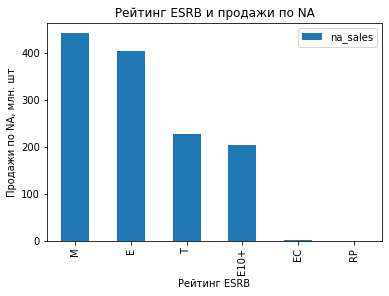

In [34]:
df_actual\
.pivot_table(index='rating', values='na_sales', aggfunc='sum',)\
.sort_values(by='na_sales', ascending=False)\
.plot(kind='bar')

plt.title('Рейтинг ESRB и продажи по NA')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи по NA, млн. шт')

Наибольшую долю в продажах по региону NA создают:
- Платформы: X360, PS3, Wii и DC.
- Жанры: Action, Shooter, Sports и Misc

Больше всего продаж у игр с рейтингом для взрослых, для детей и для подростков.

<a id='15-bullet'></a>
#### Составим портрет пользователя для региона EU

In [35]:
df_actual['part_of_sales_eu'] = df_actual['eu_sales'] / df_actual['eu_sales'].sum()

df_actual\
.pivot_table(index='platform', values=['eu_sales', 'part_of_sales_eu'], aggfunc='sum',)\
.sort_values(by='eu_sales', ascending=False)\
.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,eu_sales,part_of_sales_eu
platform,,
PS3,255.00,0.247777
X360,196.72,0.191148
PS4,141.09,0.137094
Wii,124.22,0.120702
PC,82.32,0.079988


In [36]:
df_actual\
.pivot_table(index='genre', values=['eu_sales', 'part_of_sales_eu'], aggfunc='sum',)\
.sort_values(by='eu_sales', ascending=False)\
.head()

,eu_sales,part_of_sales_eu
genre,,
Action,271.91,0.264208
Shooter,192.30,0.186853
Sports,158.51,0.154020
Misc,86.27,0.083826
Role-Playing,83.56,0.081193


Text(0, 0.5, 'Продажи по EU, млн. шт')

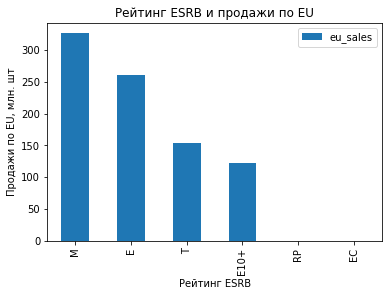

In [37]:
df_actual\
.pivot_table(index='rating', values='eu_sales', aggfunc='sum',)\
.sort_values(by='eu_sales', ascending=False)\
.plot(kind='bar')

plt.title('Рейтинг ESRB и продажи по EU')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи по EU, млн. шт')

Наибольшую долю в продажах по региону EU создают:
- Платформы: PS3, X360, PS4 и Wii.
- Жанры: Action, Shooter, Sports и Misc

Больше всего продаж у игр с рейтингом для взрослых, для детей и для подростков.

<a id='16-bullet'></a>
#### Составим портрет пользователя для региона JP

In [38]:
df_actual['part_of_sales_jp'] = df_actual['jp_sales'] / df_actual['jp_sales'].sum()

df_actual\
.pivot_table(index='platform', values=['jp_sales', 'part_of_sales_jp'], aggfunc='sum',)\
.sort_values(by='jp_sales', ascending=False)\
.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,jp_sales,part_of_sales_jp
platform,,
3DS,100.62,0.274147
PS3,68.29,0.186061
DS,52.11,0.141977
PSP,50.39,0.137291
Wii,34.32,0.093507


In [39]:
df_actual\
.pivot_table(index='genre', values=['jp_sales', 'part_of_sales_jp'], aggfunc='sum',)\
.sort_values(by='jp_sales', ascending=False)\
.head()

,jp_sales,part_of_sales_jp
genre,,
Role-Playing,120.61,0.328611
Action,84.16,0.229300
Misc,30.09,0.081982
Sports,25.32,0.068986
Platform,20.65,0.056262


Text(0, 0.5, 'Продажи по JP, млн. шт')

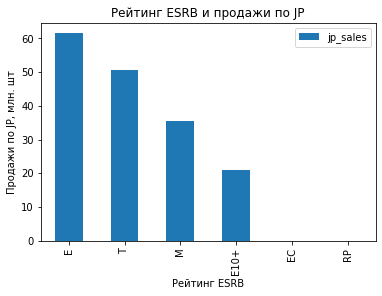

In [40]:
df_actual\
.pivot_table(index='rating', values='jp_sales', aggfunc='sum',)\
.sort_values(by='jp_sales', ascending=False)\
.plot(kind='bar')

plt.title('Рейтинг ESRB и продажи по JP')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи по JP, млн. шт')

Наибольшую долю в продажах по региону JP создают:
- Платформы: 3DC, PS3, DC и PSP.
- Жанры: Role-Playing, Action, Misc и Sports

Больше всего продаж у игр с рейтингом для детей, для подростков и для взрослых.

#### Вывод по портретам пользователей разных регионов
Портреты пользователей из регионов NA и EU похожи друг на друга, есть много пересечений в топовых для регионов платформах, жанры самых покупаемых игр и вовсе не отличаются. В этих регионах также совпала зависимость продаж от рейтинга, лидируют игры для взрослых, следом идут игры для детей и замыкают тройку игры для подростков.

Портрет пользователя региона JP сильно отличается, как по топу платформ и жанров, так и по популярности игр с разным рейтингом. Подробности:

Наибольшую долю в продажах по региону NA создают:
- Платформы: X360, PS3, Wii и DC.
- Жанры: Action, Shooter, Sports и Misc

Больше всего продаж у игр с рейтингом для взрослых, для детей и для подростков.

Наибольшую долю в продажах по региону EU создают:
- Платформы: PS3, X360, PS4 и Wii.
- Жанры: Action, Shooter, Sports и Misc

Больше всего продаж у игр с рейтингом для взрослых, для детей и для подростков.

Наибольшую долю в продажах по региону JP создают:
- Платформы: 3DC, PS3, DC и PSP.
- Жанры: Role-Playing, Action, Misc и Sports

Больше всего продаж у игр с рейтингом для детей, для подростков и для взрослых.



### 5. Проверим гипотезы

<a id='17-bullet'></a>
#### Действительно ли средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Предположим, что средние пользовательские рейтинги по платформе Xbox равны средним пользовательским рейтингам по платформе PC, это будет наша нулевая гипотеза. Альтернативной гипотезой будет, что они отличаются.

In [41]:
user_score_xbox = df_actual.query('platform == "XOne" & user_score !=500000')['user_score']
user_score_pc = df_actual.query('platform == "PC" & user_score !=500000')['user_score']

#сравним дисперсии для понимания какое значение установить equal
print('Дисперсия для xbox:', np.var(user_score_xbox, ddof=1))
print('Дисперсия для pc:', np.var(user_score_pc, ddof=1))
print()
#дисперсии нельзя считать похожими, поэтому equal установим как False

alpha = .05

results = st.ttest_ind(user_score_xbox, user_score_pc, equal_var=False)
pvalue = results.pvalue

print('Средний пользовательский рейтинг по платформе xbox: {:.7}'.format(user_score_xbox.mean()))
print('Средний пользовательский рейтинг по платформе pc: {:.7}'.format(user_score_pc.mean()))
print('p-значение: {:.7}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Дисперсия для xbox: 1.9069968429360695
Дисперсия для pc: 2.4102204499213022

Средний пользовательский рейтинг по платформе xbox: 6.521429
Средний пользовательский рейтинг по платформе pc: 6.652079
p-значение: 0.2985618
Не удалось отвергнуть нулевую гипотезу


Перед проведением статистического теста сравнили дисперсии пользовательского рейтинга для xbox и PC, сравнение показало, что они отличаются, поэтому првильно будет установить значение equal_var=False.

Несмотря на отклонения средней выручки в данных пользовательских рейтингов для xbox и pc мы не смогли отвергнуть нулевую гипотезу. Это означает, что по имебщимся данным, с вероятностью ~30% такое или большее отличие можно получить случайно.

<a id='18-bullet'></a>
#### Действительно ли средние пользовательские рейтинги жанров Action и Sports разные

Предположим, что средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports, это будет наша нулевая гипотеза. Альтернативной гипотезой будет, что они отличаются.

In [42]:
user_score_action = df_actual.query('genre == "Action" & user_score !=500000')['user_score']
user_score_sports = df_actual.query('genre == "Sports" & user_score !=500000')['user_score']

#сравним дисперсии для понимания какое значение установить equal
print('Дисперсия для action:', np.var(user_score_action, ddof=1))
print('Дисперсия для sports:', np.var(user_score_sports, ddof=1))
print()
#дисперсии нельзя считать похожими, поэтому equal установим как False


alpha = .05

results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
pvalue = results.pvalue

print('Средний пользовательский рейтинг по жанру action: {:.7}'.format(user_score_action.mean()))
print('Средний пользовательский рейтинг по жанру sports: {:.7}'.format(user_score_sports.mean()))
print('p-значение: {:.10}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Дисперсия для action: 1.845225821564057
Дисперсия для sports: 2.883255576441103

Средний пользовательский рейтинг по жанру action: 6.817415
Средний пользовательский рейтинг по жанру sports: 6.10525
p-значение: 3.493323839e-13
Отвергаем нулевую гипотезу


Перед проведением статистического теста сравнили дисперсии пользовательского рейтинга для xbox и PC, сравнение показало, что они отличаются, поэтому првильно будет установить значение equal_var=False.

Разница средних пользовательских рейтингов по жанрам значительная. По имеющимся данным нельзя утверждать, что средние пользовательские рейтинги не отличается и что эта разница могла получиться случайно.

### 6. Заключение

<a id='19-bullet'></a>
#### Общий вывод

1. В процессе подготовки данных появились следующие выводы:

    - Столбцы содержали разные названы в разном регистре. Стоит выяснить почему так получилось у инженеров, занимающихся выгрузкой.
    - Обнаружили пропуски в годе выпуска, для этих данных нет адекватной замены, отфильтровали эти строки, упустив 1,6% данных. Пропуски в рейтингах критиков, пользователей и возрастных ограничений оставим не заполняя, до тех пор, пока они не будут мешать расчетам, так как при заполнении велика вероятность сильно исказить картину. Также найдены 2 состоящие практически только из одиних пропусков строки, отильтровали их, возможно они появились в процессе выгрузки данных, когда было нестабильное соединение, желательно это выяснить.
    - Дубликатов в данных не обнаружено.
    - Обработали сокращение tbd, оно нашлось только в user_score. Это сокращение означает, что оценки ещё нет, она будет выставленна позднее. Это очень похоже на сущность пропусков в этих таких же колонках, поэтому заменим на пропуки.

2. В процессе анализа данных появились следующие выводы:
    - Анализируя количество выпусков игр по годам можно заметить как индустрия пережила пик в 2008-09 годах и после откатилась по количеству выпущенных игр на уровень 2001-02 гг. и на 2016 год тренд на дальнейшее снижение.
    - Распределение данных по платформам с топовыми продажами (PS2, X360, Wii, PS3, DS, PS), с некоторыми допущениями, симметричное.
    - Медианный срок жизни платформы 8 лет, актуальным выбрали период от 2009 года и новее.
    - Лидирующие в актуальном периоде платформы: PS3, X360, Wii, PS4, 3DS, DS. Ранее мы уже находили аналогичный список, после фильтрации по периоду в него не попали PS2 и PS, зато вошли PS3 и PS4.

    Оценивая текущее состояние продаж по платформам можем сказать следующее:
    - Видим падение по PS3, X360, Wii, DC.
    - Нестабильная ситуация, при которой сначала видим небольшой рост, потом небольшое падение по PS4, XOne, 3DS.
    - Потенциально перспективные и растущие платформы: WiiU и PC.

    - Аналзируя продажи по платформе PS3, наблюдаем линейную корреляцию средней силы между critic_score и total_sales (0.4226). Видны выбросы, которые, в целом, не мешают оценить картину. Чем выше рейтинг критиков, тем больше продаж у игры. Также наблюдаем слабую линейную корреляцию между user_score и total_sales (0.0973). При этом на графике видна значительно более сильная скученность там, где рейтинг пользователей выше.

    - Аналзируя продажи по всем платформам, также наблюдаем линейную корреляцию средней силы между critic_score и total_sales (0.2913), она слабее, чем по PS3. Видны выбросы, которые, в целом, не мешают оценить картину. Чем выше рейтинг критиков, тем больше продаж у игры.Также наблюдаем слабую линейную корреляцию между user_score и total_sales (0.0721), она также слабее, чем по PS3. При этом на графике видна значительно более сильная скученность там, где рейтинг пользователей выше.

    - Есть предположение, что активные жанры продаются лучше, чем те, в сюжете которых меньше экшена. При этом высокую долю занимаю такие нишевые жанры как sports и role-playing. Можно предположить, что чем меньше в игре активности, тем ее меньше покупают, однако, это не относится к лояльной аудитории, конкретных нишевых продкутов.

3. Портрет пользователя разных регионов
    - Портреты пользователей из регионов NA и EU похожи друг на друга, есть много пересечений в топовых для регионов платформах, жанры самых покупаемых игр и вовсе не отличаются. В этих регионах также совпала зависимость продаж от рейтинга, лидируют игры для взрослых, следом идут игры для детей и замыкают тройку игры для подростков.
    - Портрет пользователя региона JP сильно отличается, как по топу платформ и жанров, так и по популярности игр с разным рейтингом. Подробности:

    Наибольшую долю в продажах по региону NA создают:
    - Платформы: X360, PS3, Wii и DC.
    - Жанры: Action, Shooter, Sports и Misc
    Больше всего продаж у игр с рейтингом для взрослых, для детей и для подростков.

    Наибольшую долю в продажах по региону EU создают:
    - Платформы: PS3, X360, PS4 и Wii.
    - Жанры: Action, Shooter, Sports и Misc
    Больше всего продаж у игр с рейтингом для взрослых, для детей и для подростков.

    Наибольшую долю в продажах по региону JP создают:
    - Платформы: 3DC, PS3, DC и PSP.
    - Жанры: Role-Playing, Action, Misc и Sports
    Больше всего продаж у игр с рейтингом для детей, для подростков и для взрослых.

4. Проверка гипотез. Перед проведением статистических тестов сравнили дисперсии пользовательского рейтинга по выделенным показателям, сравнение в обоих случаях показало, что они отличаются, поэтому првильно будет установить значение equal_var=False.
    - Несмотря на отклонения средней выручки в данных пользовательских рейтингов для xbox и pc мы не смогли отвергнуть нулевую гипотезу. Это означает, что по имеющимся данным, с вероятностью ~30% такое или большее отличие можно получить случайно.
    - Разница средних пользовательских рейтингов по жанрам значительная. По имеющимся данным нельзя утверждать, что средние пользовательские рейтинги не отличается и что эта разница могла получиться случайно.